In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
import seaborn as sns
from datetime import datetime
from copulalib.copulalib import Copula

warnings.filterwarnings('ignore')
font_name = matplotlib.font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
krfont = {'family':font_name, 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

##### 1. 육류 가격 불러오기 

In [15]:
MeatPrice = pd.read_excel('./Downloads/MeatPrice_180609.xlsx', converters={'기간':str, '품목코드':str})
MeatPrice['기간'] = pd.to_datetime([datetime.strptime(MeatPrice['기간'][i], '%Y.%m') for i in range(len(MeatPrice))])
MeatPrice = MeatPrice.query('국가명 == "미국" or 국가명 == "호주"')
MeatPrice = MeatPrice.query('기간 > "2009-01-01"')
MeatPrice = MeatPrice.query('품목코드 == "0201" or 품목코드 == "0202"').drop(['수출중량','수출금액'], axis=1).eval('단위수입금액 = 수입금액/수입중량*1000')

##### 2. 품목별/국가별 단위수입금액 시계열

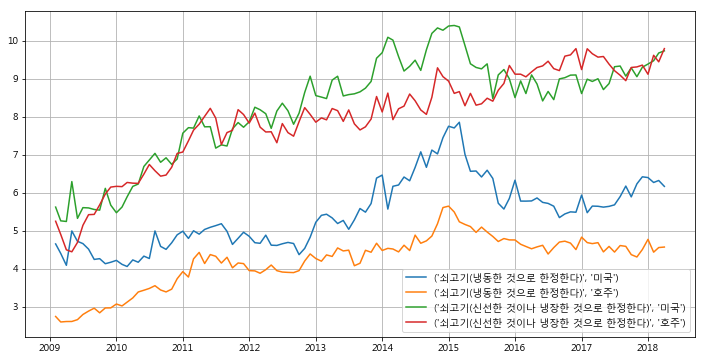

In [17]:
plt.figure(figsize=(12,6))
groups = MeatPrice.groupby(['품목명', '국가명'])

for k, v in groups:
    plt.plot(v['기간'], v['단위수입금액'], label=str(k))
    
plt.grid(True)
plt.legend()
plt.show()

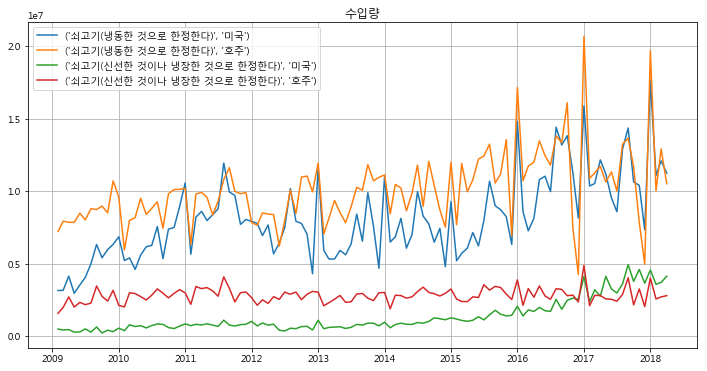

In [22]:
plt.figure(figsize=(12,6))
groups = MeatPrice.groupby(['품목명', '국가명'])

for k, v in groups:
    plt.plot(v['기간'], v['수입중량'], label=str(k))
    
plt.grid(True)
plt.legend()
plt.title('수입량')
plt.show()

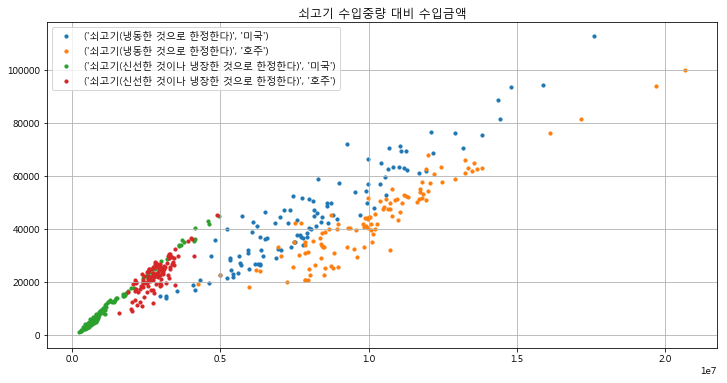

In [38]:
plt.figure(figsize=(12,6))
groups = MeatPrice.groupby(['품목명', '국가명'])

for k, v in groups:
    plt.scatter(v['수입중량'], v['수입금액'], label=str(k), s=10)
    
plt.grid(True)
plt.legend()
plt.title('쇠고기 수입중량 대비 수입금액')
plt.show()

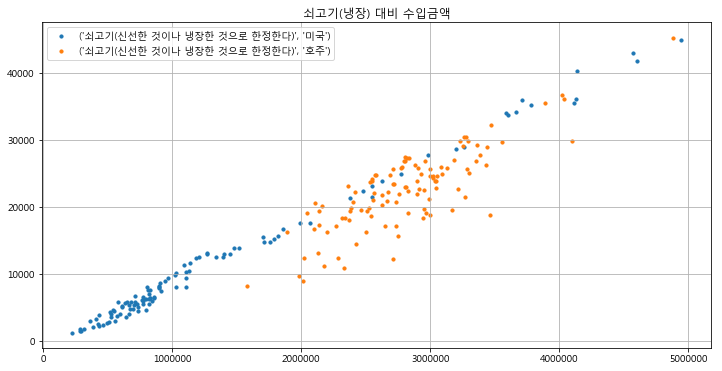

In [39]:
plt.figure(figsize=(12,6))
groups = MeatPrice.query('품목코드 == "0201"').groupby(['품목명', '국가명'])

for k, v in groups:
    plt.scatter(v['수입중량'], v['수입금액'], label=str(k), s=10)
    
plt.grid(True)
plt.legend()
plt.title('쇠고기(냉장) 대비 수입금액')
plt.show()

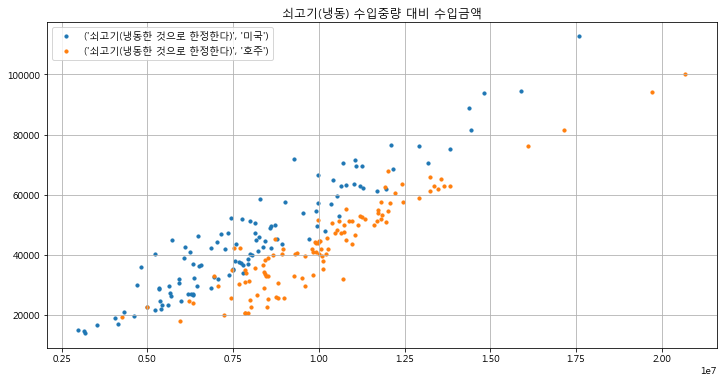

In [40]:
plt.figure(figsize=(12,6))
groups = MeatPrice.query('품목코드 == "0202"').groupby(['품목명', '국가명'])

for k, v in groups:
    plt.scatter(v['수입중량'], v['수입금액'], label=str(k), s=10)
    
plt.grid(True)
plt.legend()
plt.title('쇠고기(냉동) 수입중량 대비 수입금액')
plt.show()

##### 3. Copula

In [127]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian').fit(np.array(MP_USA['수입중량']).reshape(len(MP_USA),1))
x = kde.sample(10000)

In [128]:
kde = KernelDensity(kernel='gaussian').fit(np.array(MP_USA['수입금액']).reshape(len(MP_USA),1))
y = kde.sample(10000)

In [129]:
MP_USA = MeatPrice.query('품목코드 == "0202" and 국가명 == "미국"')
frank = Copula(MP_USA['수입중량'], MP_USA['수입금액'], family='frank')
clayton = Copula(MP_USA['수입중량'], MP_USA['수입금액'], family='clayton')
gumbel = Copula(MP_USA['수입중량'], MP_USA['수입금액'], family='gumbel')

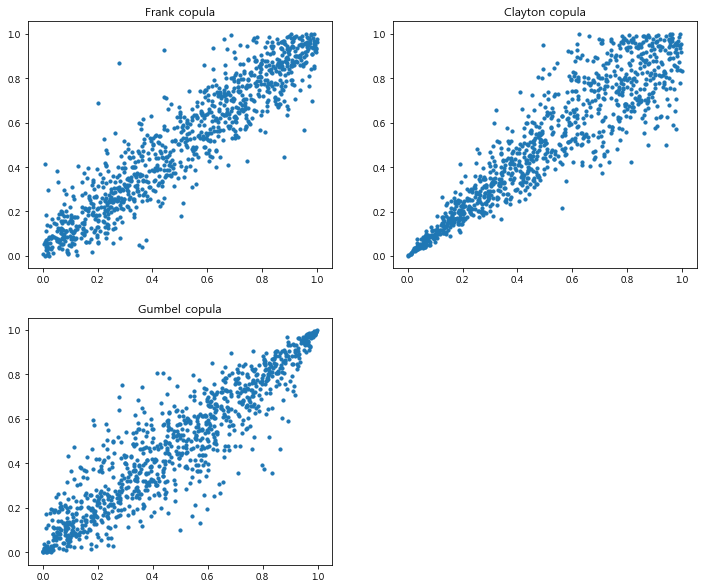

In [130]:
plt.figure(figsize=(12,10))

plt.subplot(221)
uf, vf = frank.generate_uv(1000)
plt.scatter(uf,vf, s=10)
plt.title('Frank copula')

plt.subplot(222)
uf, vf = clayton.generate_uv(1000)
plt.scatter(uf,vf, s=10)
plt.title('Clayton copula')

plt.subplot(223)
uf, vf = gumbel.generate_uv(1000)
plt.scatter(uf,vf, s=10)
plt.title('Gumbel copula')

plt.show()